In [1]:
cd ..

/Users/yzerlaut/work/sparse_vs_balanced


In [2]:
"""
Necessary modules
"""
import sys, os
%load_ext autoreload
%autoreload 2 # autoreload to debug/modify modules
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from graphs.my_graph import * # my custom module for ~nice plots
# all figures will be saved to svg on the desktop for inclusions in multipanels
desktop = os.path.join(os.path.join(os.path.expanduser('~')), 'Desktop')+os.path.sep
home = os.path.join(os.path.expanduser('~'), os.path.sep)

Blue, Orange, Green, Red, Purple, Brown, Pink, Grey,\
    Kaki, Cyan = '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',\
    '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'

# Response to sparse spiking patterns

In [3]:
from model import pass_arguments_of_new_model, Model
import os

def build_varying_pattern_scan(faff_bsl, discretization, Nseed, filename,
                                            with_time_shift_synchronous_input=False,
                                            with_neuron_shift_synchronous_input=False,
                                            with_neuronpop_shift_synchronous_input=False):
    from model import pass_arguments_of_new_model, Model
    Model2 = Model.copy()
    Model2['p_AffExc_DsInh'] = 0.075
    S = 'python sparse_vs_balanced/sparse_spiking_input.py '+pass_arguments_of_new_model(Model2)
    S += ' --SEEDS'
    for s in np.arange(10, Nseed+10): S += ' '+str(s)
    S += ' --faff_bsl '+str(faff_bsl)
    S += ' -N '+str(discretization)
    if with_time_shift_synchronous_input:
        S += ' --with_time_shift_synchronous_input'
    if with_neuron_shift_synchronous_input:
        S += ' --with_neuron_shift_synchronous_input'
    if with_neuronpop_shift_synchronous_input:
        S += ' --with_neuronpop_shift_synchronous_input'
    S += ' -f sparse_vs_balanced/data'+os.path.sep+filename+' \n'
    print('sget sparse_vs_balanced/data'+os.path.sep+filename)
    return S

discretization, Nseed = 10, 20
# discretization, Nseed = 2, 3

S1 = build_varying_pattern_scan(4., discretization, Nseed,
                                'sparse_input_SA_with_time_shift_synchronous_input.zip',
                                with_time_shift_synchronous_input=True)    
S2 = build_varying_pattern_scan(14., discretization, Nseed,
                                'sparse_input_BA_with_time_shift_synchronous_input.zip',
                                with_time_shift_synchronous_input=True)
# S3 = build_varying_pattern_scan(4., discretization, Nseed,
#                                 'sparse_input_SA_with_neuron_shift_synchronous_input.zip',
#                                 with_neuron_shift_synchronous_input=True)    
# S4 = build_varying_pattern_scan(14., discretization, Nseed,
#                                 'sparse_input_BA_with_neuron_shift_synchronous_input.zip',
#                                 with_neuron_shift_synchronous_input=True)
# S1 = build_varying_pattern_scan(4., discretization, Nseed,
#                                 'sparse_input_SA_with_neuronpop_shift_synchronous_input.zip',
#                                 with_neuronpop_shift_synchronous_input=True)    
# S2 = build_varying_pattern_scan(14., discretization, Nseed,
#                                 'sparse_input_BA_with_neuronpop_shift_synchronous_input.zip',
#                                 with_neuronpop_shift_synchronous_input=True)

bash_file = open('sparse_vs_balanced/bash_scan/dissecting_sparse_spiking.sh', 'w')
#bash_file.write(S1+S2+S3+S4)
bash_file.write(S1+S2)
bash_file.close()

sget sparse_vs_balanced/data/sparse_input_SA_with_time_shift_synchronous_input.zip
sget sparse_vs_balanced/data/sparse_input_BA_with_time_shift_synchronous_input.zip


## Plotting raster activity functions

In [6]:
"""
Plotting raster activity (input and network response)
"""
%matplotlib inline
import matplotlib.cm as cm
Ntraining, Ntest = 10, 10
def show_presynaptic_activity_over_trials(PRESYNAPTIC_PATTERNS_RASTER, pattern_id=0,
                                          nrn_ids=np.arange(10), Nbar=10,
                                          trial_max=20, sep_factor=1., ms=4):
    fig, ax = plt.subplots(figsize=(2.5,2.1))
    ax.plot([-t_pre, Model['time_span']+t_post], [0,0], 'w.', ms=0.1)
    for k, n in enumerate(nrn_ids):
        tspikes = np.array(PRESYNAPTIC_PATTERNS_RASTER[pattern_id][n])
        plt.plot(tspikes-Model['t0'], k+0.*tspikes, 'k.', ms=ms)
    x1, x2 = ax.get_xlim()
    # for n in range(len(nrn_ids)):
    #     ax.fill_between([x1, x2], n*sep_factor*np.ones(2), (n*sep_factor+1)*np.ones(2), color=cm.copper(1.-n/(len(nrn_ids)-1)/1.5))
    ax.plot([0,0], [0, Nbar], '-', color='grey', lw=4)
    ax.annotate(str(Nbar)+'neurons', (0, ax.get_ylim()[1]/2.5), rotation=90, fontsize=14)
    ax.plot([0, Model['time_span']], [0,0], '-', color='grey', lw=8, alpha=.5)
    set_plot(ax, ['bottom'], yticks=[],
             xlabel='time (ms)',
             xlim=[-t_pre, Model['time_span']+t_post], xticks=np.arange(3)*250)
    return fig

def show_spiking_activity_over_trials(TRAINING_PATTERN, TEST_PATTERN, pattern_id=0,
                                      Ntraining=Ntraining, Ntest=Ntest, nrn_ids=np.arange(10),
                                      trial_max=20, sep_factor=1.2, ms=4):
    fig, ax = plt.subplots(figsize=(2.5,2.1))
    ax.plot([-t_pre, Model['time_span']+t_post], [0,0], 'w.', ms=0.1)
    for j in np.arange(min([Ntraining, trial_max])):
        for k, n in enumerate(nrn_ids):
            tspikes = np.array(TRAINING_PATTERN[pattern_id*Ntraining+j][n])
            plt.plot(tspikes-Model['t0'], k*sep_factor*trial_max+j+0.*tspikes, 'k.', ms=ms)
    for j, l in enumerate(np.arange(Ntraining, min([Ntraining+Ntest, trial_max]))):
        for k, n in enumerate(nrn_ids):
            tspikes = np.array(TEST_PATTERN[pattern_id*Ntest+j][n])
            plt.plot(tspikes-Model['t0'], k*sep_factor*trial_max+l+0.*tspikes, 'k.', ms=ms)
    x1, x2 = ax.get_xlim()
    N = np.arange(len(nrn_ids))
    # np.random.seed(1);np.random.shuffle(N)
    for i, n in enumerate(N):
        ax.fill_between([x1, x2], n*sep_factor*trial_max*np.ones(2), (n*sep_factor+1)*trial_max*np.ones(2),
                        color=cm.copper(1.-i/(len(nrn_ids)-1)/2.))
    ax.plot([0,0], [0, min([Ntraining+Ntest, trial_max])], '-', color='grey', lw=4)
    ax.annotate(str(min([Ntraining+Ntest, trial_max]))+'trials', (0, ax.get_ylim()[1]/2.5), rotation=90, fontsize=14)
    ax.plot([0, Model['time_span']], [0,0], '-', color='grey', lw=8, alpha=.5)
    set_plot(ax, ['bottom'], yticks=[],
             xlabel='time (ms)',
             xlim=[-t_pre, Model['time_span']+t_post], xticks=np.arange(3)*250)
    return fig


# Baseline patterns

In [8]:
from sparse_vs_balanced.sparse_spiking_input import get_scan
from graphs.my_graph import *

t_pre, t_post = 100, 100 # we also considered 100 ms around the stim

Patterns, seeds, _, DATA_SA = get_scan({}, filename='sparse_vs_balanced/data/sparse_input_SA.zip')
F_aff, seeds, Model, DATA_BA = get_scan({}, filename='sparse_vs_balanced/data/sparse_input_BA.zip')

Ntraining = int(len(seeds)/3) # one third of the data

PRESYNAPTIC_PATTERNS_TRAINING = []
# each element will be a RASTER corresponding to one pattern and one seed !
SA_PATTERNS_TRAINING, BA_PATTERNS_TRAINING = [], []

PRESYNAPTIC_PATTERNS_TEST = []
# each element will be a RASTER corresponding to one pattern and one seed !
SA_PATTERNS_TEST, BA_PATTERNS_TEST = [], []

# we will also get the (trial-invariants) input patterns
PRESYNAPTIC_PATTERNS_RASTER = []

Ntest = len(seeds)-Ntraining # the rest of the data

for i in range(len(Patterns)):
    # TRAINING SET
    for j in range(Ntraining): # seeds only in the first training seet
        # first loop for training
        for DATA, PATTERNS in zip([DATA_SA, DATA_BA], [SA_PATTERNS_TRAINING, BA_PATTERNS_TRAINING]):
            data = DATA[i*len(seeds)+j]
            cond = (data['tRASTER_RecExc']>Model['t0']-t_pre) &\
                (data['iRASTER_RecExc']<int(Model['N_target'])) &\
                (data['tRASTER_RecExc']<Model['t0']+Model['time_span']+t_post)
            RASTER = []
            for ii in np.arange(int(Model['N_target'])):
                Nrn = []
                i0 = np.argwhere(data['iRASTER_RecExc'][cond]==ii).flatten()
                Nrn += list(data['tRASTER_RecExc'][cond][i0].flatten())
                RASTER.append(Nrn)
            PATTERNS.append(RASTER)
        PRESYNAPTIC_PATTERNS_TRAINING.append(i)
    # TEST SET
    for j in range(Ntraining, len(seeds)): # seeds only in the test set
        # second loop for tests
        for DATA, PATTERNS in zip([DATA_SA, DATA_BA], [SA_PATTERNS_TEST, BA_PATTERNS_TEST]):
            data = DATA[i*len(seeds)+j]
            cond = (data['tRASTER_RecExc']>Model['t0']-t_pre) & (data['iRASTER_RecExc']<int(Model['N_target'])) &\
                                  (data['tRASTER_RecExc']<Model['t0']+Model['time_span']+t_post)
            RASTER = []
            for ii in np.arange(int(Model['N_target'])):
                Nrn = []
                i0 = np.argwhere(data['iRASTER_RecExc'][cond]==ii).flatten()
                Nrn += list(data['tRASTER_RecExc'][cond][i0].flatten())
                RASTER.append(Nrn)
            PATTERNS.append(RASTER)
        PRESYNAPTIC_PATTERNS_TEST.append(i) # A simple index accounts for the 
    ## AFFERENT SPIKES
    ## We also collect the afferent stimulus (identical on all seeds, so we take it on the last 'j' seed)
    RASTER = []
    for n in np.arange(Model['N_target']):
        Nrn = []
        i0 = np.argwhere(data['iRASTER_PRE_in_terms_of_Pre_Pop'][0]==n).flatten()
        Nrn += list(data['tRASTER_PRE_in_terms_of_Pre_Pop'][0][i0].flatten())
        RASTER.append(Nrn)
    PRESYNAPTIC_PATTERNS_RASTER.append(RASTER)
        

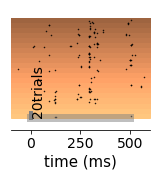

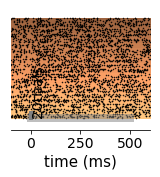

In [9]:
PATTERN_ID = 1
fig1 = show_presynaptic_activity_over_trials(PRESYNAPTIC_PATTERNS_RASTER, nrn_ids=np.arange(100), pattern_id=PATTERN_ID,
                                             ms=3)
fig2 = show_spiking_activity_over_trials(SA_PATTERNS_TRAINING, SA_PATTERNS_TEST, pattern_id=PATTERN_ID,
                                         nrn_ids=[0, 49, 7, 13, 14,\
                                                  9, 15, 47, 63, 79,\
                                                  92, 25, 93, 67, 81,\
                                                  82, 89, 77, 51, 60],
                                         trial_max=20, ms=1)
fig3 = show_spiking_activity_over_trials(BA_PATTERNS_TRAINING, BA_PATTERNS_TEST, pattern_id=PATTERN_ID,
                                         nrn_ids=[0, 49, 7, 13, 14,\
                                                  9, 15, 47, 63, 79,\
                                                  92, 25, 93, 67, 81,\
                                                  82, 89, 77, 51, 60],
                                         trial_max=20, ms=1)
#put_list_of_figs_to_svg_fig([fig1, fig2, fig3], fig_name=desktop+'temp.svg')
#fig1.savefig(desktop+'temp2.svg')

## Decoding (baseline patterns)

In [10]:
"""
A distance based on the Multi-Unit Van Rossum metrics
"""
import pymuvr                                     
def spike_train_distance(PATTERNS, cos=0.1, tau=5):
    return pymuvr.square_dissimilarity_matrix(PATTERNS,\
                                              cos, tau, 'distance')[0,1]
"""
Desiging a custom 'metric' function that fits the datatype of 'sklearn.neighbors.KNeighborsClassifier'
"""
# for the sparse activity data
def my_func_SA(X1, X2):
    flag1, index1 = X1
    flag2, index2 = X2
    # constructing RASTER1
    if flag1==1: RASTER1 = SA_PATTERNS_TEST[int(index1)] # test flag
    elif flag1==0: RASTER1 = SA_PATTERNS_TRAINING[int(index1)] # training flag
    else: RASTER1 = None # this will raise an error
    # constructing RASTER2
    if flag2==1: RASTER2 = SA_PATTERNS_TEST[int(index2)] # test flag
    elif flag2==0: RASTER2 = SA_PATTERNS_TRAINING[int(index2)] # training flag
    else: RASTER2 = None # this will raise an error
        
    return spike_train_distance([RASTER1, RASTER2])

# for the balanced activity data
def my_func_BA(X1, X2):
    flag1, index1 = X1
    flag2, index2 = X2
    # constructing RASTER1
    if flag1==1: RASTER1 = BA_PATTERNS_TEST[int(index1)] # test flag
    elif flag1==0: RASTER1 = BA_PATTERNS_TRAINING[int(index1)] # training flag
    else: RASTER1 = None # this will raise an error
    # constructing RASTER2
    if flag2==1: RASTER2 = BA_PATTERNS_TEST[int(index2)] # test flag
    elif flag2==0: RASTER2 = BA_PATTERNS_TRAINING[int(index2)] # training flag
    else: RASTER2 = None # this will raise an error
        
    return spike_train_distance([RASTER1, RASTER2])

In [11]:
"""
performing the classification for Sparse Activity
"""
import pymuvr
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=1, metric=my_func_SA)
# neigh = KNeighborsClassifier(n_neighbors=1, metric=pymuvr.square_dissimilarity_matrix)
neigh.fit([np.array([0, i]) for i in range(len(SA_PATTERNS_TRAINING))], PRESYNAPTIC_PATTERNS_TRAINING)
SA_PREDICTED = neigh.predict([[1, i] for i in range(len(SA_PATTERNS_TEST))])

In [12]:
"""
performing the classification for Balanced Activity
"""
neigh = KNeighborsClassifier(n_neighbors=1, metric=my_func_BA)
neigh.fit([np.array([0, i]) for i in range(len(BA_PATTERNS_TRAINING))], PRESYNAPTIC_PATTERNS_TRAINING)
BA_PREDICTED = neigh.predict([[1, i] for i in range(len(BA_PATTERNS_TEST))])

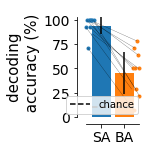

In [13]:
# making accuracy fig
Blue, Orange = '#1f77b4', '#ff7f0e'

fig = plt.figure(figsize=(1.1, 2.))

BA_accuracy, SA_accuracy = [], []
for k in np.unique(PRESYNAPTIC_PATTERNS_TEST):
    i0 = np.argwhere(np.array(PRESYNAPTIC_PATTERNS_TEST)==k).flatten()
    # print(i0, k)
    BA_accuracy.append(0)
    SA_accuracy.append(0)
    for i in i0:
        if PRESYNAPTIC_PATTERNS_TEST[i]==BA_PREDICTED[i]:
            BA_accuracy[-1] += 1./len(i0)
        if PRESYNAPTIC_PATTERNS_TEST[i]==SA_PREDICTED[i]:
            SA_accuracy[-1] += 1./len(i0)
    plt.plot([-0.5+(-1)**k*k/50.], [100.*SA_accuracy[-1]], '.', color=Blue)
    plt.plot([1.5+(-1)**k*k/50.], [100.*BA_accuracy[-1]], '.', color=Orange)
    plt.plot([-0.5+(-1)**k*k/50., 1.5+(-1)**k*k/50.],\
             [100.*SA_accuracy[-1], 100.*BA_accuracy[-1]], 'k-', lw=0.2)

plt.bar([0], [100.*np.array(SA_accuracy).mean()], yerr=[100.*np.array(SA_accuracy).std()], color=Blue)
plt.bar([1], [100.*np.array(BA_accuracy).mean()], yerr=[100.*np.array(BA_accuracy).std()], color=Orange)
plt.plot([-.4, 1.4], 100*1./len(PRESYNAPTIC_PATTERNS_RASTER)*np.ones(2), 'k--', label='chance')
plt.legend()
set_plot(plt.gca(), xticks=[0,1], xticks_labels=['SA', 'BA'], ylabel='decoding \n accuracy (%)')
fig.savefig(desktop+'temp.svg')

# Shifting target neurons

In [126]:
from sparse_vs_balanced.sparse_spiking_input import get_scan
from graphs.my_graph import *

Patterns, seeds, _, DATA_SA = get_scan({},
                    filename='sparse_vs_balanced/data/sparse_input_SA_with_neuronpop_shift_synchronous_input.zip')
F_aff, seeds, Model, DATA_BA = get_scan({},
                    filename='sparse_vs_balanced/data/sparse_input_BA_with_neuronpop_shift_synchronous_input.zip')

PRESYNAPTIC_PATTERNS_WITH_NEURON_POP_SHIFT = []
# each element will be a RASTER corresponding to one pattern and one seed !
SA_PATTERNS_WITH_NEURON_POP_SHIFT,\
    BA_PATTERNS_WITH_NEURON_POP_SHIFT = [], []

# we will also get the (trial-invariants) input patterns
PRESYNAPTIC_PATTERNS_RASTER_WITH_NEURON_POP_SHIFT = []

for i in range(len(Patterns)):
    for j in range(len(seeds)): # seeds only in the first training seet
        for DATA, PATTERNS in zip([DATA_SA, DATA_BA],
                                  [SA_PATTERNS_WITH_NEURON_POP_SHIFT,\
                                   BA_PATTERNS_WITH_NEURON_POP_SHIFT]):
            data = DATA[i*len(seeds)+j]
            cond = (data['tRASTER_RecExc']>Model['t0']-t_pre) &\
                (data['iRASTER_RecExc']<int(Model['N_target'])) &\
                (data['tRASTER_RecExc']<Model['t0']+Model['time_span']+t_post)
            RASTER = []
            for ii in np.arange(int(Model['N_target'])):
                Nrn = []
                i0 = np.argwhere(data['iRASTER_RecExc'][cond]==ii).flatten()
                Nrn += list(data['tRASTER_RecExc'][cond][i0].flatten())
                RASTER.append(Nrn)
            PATTERNS.append(RASTER)
    PRESYNAPTIC_PATTERNS_WITH_NEURON_POP_SHIFT.append(i)
    ## AFFERENT SPIKES
    ## We also collect the afferent stimulus (identical on all seeds, so we take it on the last 'j' seed)
    RASTER = []
    for n in np.arange(Model['N_target']):
        Nrn = []
        i0 = np.argwhere(data['iRASTER_PRE_in_terms_of_Pre_Pop'][0]==n).flatten()
        Nrn += list(data['tRASTER_PRE_in_terms_of_Pre_Pop'][0][i0].flatten())
        RASTER.append(Nrn)
    PRESYNAPTIC_PATTERNS_RASTER_WITH_NEURON_POP_SHIFT.append(RASTER)

PATTERN_ID = 1
fig1 = show_presynaptic_activity_over_trials(PRESYNAPTIC_PATTERNS_RASTER_WITH_NEURON_POP_SHIFT,
                                             nrn_ids=np.arange(100), pattern_id=PATTERN_ID,
                                             ms=3)
fig2 = show_spiking_activity_over_trials(SA_PATTERNS_WITH_NEURON_POP_SHIFT,
                                         [],
                                         pattern_id=PATTERN_ID, Ntest=0, Ntraining=20, trial_max=20,
                                         nrn_ids=[0, 49, 7, 13, 14,\
                                                  9, 15, 47, 63, 79,\
                                                  92, 25, 93, 67, 81,\
                                                  82, 89, 77, 51, 60],
                                         ms=1)
fig3 = show_spiking_activity_over_trials(BA_PATTERNS_WITH_NEURON_POP_SHIFT,
                                         [],
                                         pattern_id=PATTERN_ID, Ntest=0, Ntraining=20, trial_max=20,
                                         nrn_ids=[0, 49, 7, 13, 14,\
                                                  9, 15, 47, 63, 79,\
                                                  92, 25, 93, 67, 81,\
                                                  82, 89, 77, 51, 60],
                                         ms=1)
put_list_of_figs_to_svg_fig([fig1, fig2, fig3], fig_name=desktop+'temp.svg')

## Decoding (shifting target neurons)

In [129]:
"""
A distance based on the Multi-Unit Van Rossum metrics
"""
import pymuvr                                     
def spike_train_distance(PATTERNS, cos=0.1, tau=5):
    return pymuvr.square_dissimilarity_matrix(PATTERNS,\
                                              cos, tau, 'distance')[0,1]
"""
Desiging a custom 'metric' function that fits the datatype of 'sklearn.neighbors.KNeighborsClassifier'
"""
# for the sparse activity data
def my_func_SA(X1, X2):
    flag1, index1 = X1
    flag2, index2 = X2
    # constructing RASTER1
    if flag1==1: RASTER1 = SA_PATTERNS_WITH_NEURON_POP_SHIFT[int(index1)] # test flag
    elif flag1==0: RASTER1 = SA_PATTERNS_TRAINING[int(index1)] # training flag
    else: RASTER1 = None # this will raise an error
    # constructing RASTER2
    if flag2==1: RASTER2 = SA_PATTERNS_WITH_NEURON_POP_SHIFT[int(index2)] # test flag
    elif flag2==0: RASTER2 = SA_PATTERNS_TRAINING[int(index2)] # training flag
    else: RASTER2 = None # this will raise an error
        
    return spike_train_distance([RASTER1, RASTER2])

# for the balanced activity data
def my_func_BA(X1, X2):
    flag1, index1 = X1
    flag2, index2 = X2
    # constructing RASTER1
    if flag1==1: RASTER1 = BA_PATTERNS_WITH_NEURON_POP_SHIFT[int(index1)] # test flag
    elif flag1==0: RASTER1 = BA_PATTERNS_TRAINING[int(index1)] # training flag
    else: RASTER1 = None # this will raise an error
    # constructing RASTER2
    if flag2==1: RASTER2 = BA_PATTERNS_WITH_NEURON_POP_SHIFT[int(index2)] # test flag
    elif flag2==0: RASTER2 = BA_PATTERNS_TRAINING[int(index2)] # training flag
    else: RASTER2 = None # this will raise an error
        
    return spike_train_distance([RASTER1, RASTER2])


In [130]:
"""
performing the classification for Sparse Activity
"""
import pymuvr
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=1, metric=my_func_SA)
neigh.fit([np.array([0, i]) for i in range(len(SA_PATTERNS_TRAINING))], PRESYNAPTIC_PATTERNS_TRAINING)
SA_PREDICTED = neigh.predict([[1, i] for i in range(len(SA_PATTERNS_WITH_NEURON_POP_SHIFT))])

In [131]:
"""
performing the classification for Balanced Activity
"""
neigh = KNeighborsClassifier(n_neighbors=1, metric=my_func_BA)
neigh.fit([np.array([0, i]) for i in range(len(BA_PATTERNS_TRAINING))], PRESYNAPTIC_PATTERNS_TRAINING)
BA_PREDICTED = neigh.predict([[1, i] for i in range(len(BA_PATTERNS_WITH_NEURON_POP_SHIFT))])

In [134]:
# making accuracy fig
Blue, Orange = '#1f77b4', '#ff7f0e'

fig = plt.figure(figsize=(1.1, 2.))

BA_accuracy, SA_accuracy = [], []
for k in np.unique(PRESYNAPTIC_PATTERNS_TEST):
    i0 = np.argwhere(np.array(PRESYNAPTIC_PATTERNS_TEST)==k).flatten()
    # print(i0, k)
    BA_accuracy.append(0)
    SA_accuracy.append(0)
    for i in i0:
        if PRESYNAPTIC_PATTERNS_TEST[i]==BA_PREDICTED[i]:
            BA_accuracy[-1] += 1./len(i0)
        if PRESYNAPTIC_PATTERNS_TEST[i]==SA_PREDICTED[i]:
            SA_accuracy[-1] += 1./len(i0)
    plt.plot([-0.5+(-1)**k*k/50.], [100.*SA_accuracy[-1]], '.', color=Blue)
    plt.plot([1.5+(-1)**k*k/50.], [100.*BA_accuracy[-1]], '.', color=Orange)
    plt.plot([-0.5+(-1)**k*k/50., 1.5+(-1)**k*k/50.],\
             [100.*SA_accuracy[-1], 100.*BA_accuracy[-1]], 'k-', lw=0.2)


plt.bar([0], [100.*np.array(SA_accuracy).mean()], yerr=[100.*np.array(SA_accuracy).std()], color=Blue)
plt.bar([1], [100.*np.array(BA_accuracy).mean()], yerr=[100.*np.array(BA_accuracy).std()], color=Orange)
plt.plot([-.4, 1.4], 100*1./len(PRESYNAPTIC_PATTERNS_RASTER)*np.ones(2), 'k--', label='chance')
plt.plot([0], [100], 'w.')
# plt.legend()
set_plot(plt.gca(), xticks=[0,1], yticks=np.arange(5)*25, xticks_labels=['SA', 'BA'], ylabel='decoding \n accuracy (%)')
fig.savefig(desktop+'temp.svg')

# Shifting temporal activation

In [14]:
from sparse_vs_balanced.sparse_spiking_input import get_scan
from graphs.my_graph import *

Patterns, seeds, _, DATA_SA = get_scan({},
                    filename='sparse_vs_balanced/data/sparse_input_SA_with_time_shift_synchronous_input.zip')
F_aff, seeds, Model, DATA_BA = get_scan({},
                    filename='sparse_vs_balanced/data/sparse_input_BA_with_time_shift_synchronous_input.zip')

PRESYNAPTIC_PATTERNS_WITH_TIME_SHIFT = []
# each element will be a RASTER corresponding to one pattern and one seed !
SA_PATTERNS_WITH_TIME_SHIFT,\
    BA_PATTERNS_WITH_TIME_SHIFT = [], []

# we will also get the (trial-invariants) input patterns
PRESYNAPTIC_PATTERNS_RASTER_WITH_TIME_SHIFT = []

for i in range(len(Patterns)):
    for j in range(len(seeds)): # seeds only in the first training seet
        for DATA, PATTERNS in zip([DATA_SA, DATA_BA],
                                  [SA_PATTERNS_WITH_TIME_SHIFT,\
                                   BA_PATTERNS_WITH_TIME_SHIFT]):
            data = DATA[i*len(seeds)+j]
            cond = (data['tRASTER_RecExc']>Model['t0']-t_pre) &\
                (data['iRASTER_RecExc']<int(Model['N_target'])) &\
                (data['tRASTER_RecExc']<Model['t0']+Model['time_span']+t_post)
            RASTER = []
            for ii in np.arange(int(Model['N_target'])):
                Nrn = []
                i0 = np.argwhere(data['iRASTER_RecExc'][cond]==ii).flatten()
                Nrn += list(data['tRASTER_RecExc'][cond][i0].flatten())
                RASTER.append(Nrn)
            PATTERNS.append(RASTER)
    PRESYNAPTIC_PATTERNS_WITH_TIME_SHIFT.append(i)
    ## AFFERENT SPIKES
    ## We also collect the afferent stimulus (identical on all seeds, so we take it on the last 'j' seed)
    RASTER = []
    for n in np.arange(Model['N_target']):
        Nrn = []
        i0 = np.argwhere(data['iRASTER_PRE_in_terms_of_Pre_Pop'][0]==n).flatten()
        Nrn += list(data['tRASTER_PRE_in_terms_of_Pre_Pop'][0][i0].flatten())
        RASTER.append(Nrn)
    PRESYNAPTIC_PATTERNS_RASTER_WITH_TIME_SHIFT.append(RASTER)


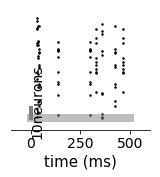

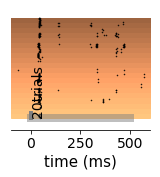

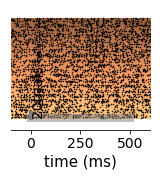

In [16]:
PATTERN_ID = 1
fig1 = show_presynaptic_activity_over_trials(PRESYNAPTIC_PATTERNS_RASTER_WITH_TIME_SHIFT,
                                             nrn_ids=np.arange(100), pattern_id=PATTERN_ID,
                                             ms=3)
fig2 = show_spiking_activity_over_trials(SA_PATTERNS_WITH_TIME_SHIFT,
                                         [],
                                         pattern_id=PATTERN_ID, Ntest=0, Ntraining=20, trial_max=20,
                                         nrn_ids=[0, 49, 7, 13, 14,\
                                                  9, 15, 47, 63, 79,\
                                                  92, 25, 93, 67, 81,\
                                                  82, 89, 77, 51, 60],
                                         ms=1)
fig3 = show_spiking_activity_over_trials(BA_PATTERNS_WITH_TIME_SHIFT,
                                         [],
                                         pattern_id=PATTERN_ID, Ntest=0, Ntraining=20, trial_max=20,
                                         nrn_ids=[0, 49, 7, 13, 14,\
                                                  9, 15, 47, 63, 79,\
                                                  92, 25, 93, 67, 81,\
                                                  82, 89, 77, 51, 60],
                                         ms=1)
#put_list_of_figs_to_svg_fig([fig1, fig2, fig3], fig_name=desktop+'temp.svg')
#fig1.savefig(desktop+'temp2.svg')

## Decoding (shifting temporal activation)

In [17]:
"""
A distance based on the Multi-Unit Van Rossum metrics
"""
import pymuvr                                     
def spike_train_distance(PATTERNS, cos=0.1, tau=5):
    return pymuvr.square_dissimilarity_matrix(PATTERNS,\
                                              cos, tau, 'distance')[0,1]
"""
Desiging a custom 'metric' function that fits the datatype of 'sklearn.neighbors.KNeighborsClassifier'
"""
# for the sparse activity data
def my_func_SA(X1, X2):
    flag1, index1 = X1
    flag2, index2 = X2
    # constructing RASTER1
    if flag1==1: RASTER1 = SA_PATTERNS_WITH_TIME_SHIFT[int(index1)] # test flag
    elif flag1==0: RASTER1 = SA_PATTERNS_TRAINING[int(index1)] # training flag
    else: RASTER1 = None # this will raise an error
    # constructing RASTER2
    if flag2==1: RASTER2 = SA_PATTERNS_WITH_TIME_SHIFT[int(index2)] # test flag
    elif flag2==0: RASTER2 = SA_PATTERNS_TRAINING[int(index2)] # training flag
    else: RASTER2 = None # this will raise an error
        
    return spike_train_distance([RASTER1, RASTER2])

# for the balanced activity data
def my_func_BA(X1, X2):
    flag1, index1 = X1
    flag2, index2 = X2
    # constructing RASTER1
    if flag1==1: RASTER1 = BA_PATTERNS_WITH_TIME_SHIFT[int(index1)] # test flag
    elif flag1==0: RASTER1 = BA_PATTERNS_TRAINING[int(index1)] # training flag
    else: RASTER1 = None # this will raise an error
    # constructing RASTER2
    if flag2==1: RASTER2 = BA_PATTERNS_WITH_TIME_SHIFT[int(index2)] # test flag
    elif flag2==0: RASTER2 = BA_PATTERNS_TRAINING[int(index2)] # training flag
    else: RASTER2 = None # this will raise an error
        
    return spike_train_distance([RASTER1, RASTER2])

In [18]:
"""
performing the classification for Sparse Activity
"""
import pymuvr
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=1, metric=my_func_SA)
neigh.fit([np.array([0, i]) for i in range(len(SA_PATTERNS_TRAINING))], PRESYNAPTIC_PATTERNS_TRAINING)
SA_PREDICTED = neigh.predict([[1, i] for i in range(len(SA_PATTERNS_WITH_TIME_SHIFT))])

In [19]:
"""
performing the classification for Balanced Activity
"""
neigh = KNeighborsClassifier(n_neighbors=1, metric=my_func_BA)
neigh.fit([np.array([0, i]) for i in range(len(BA_PATTERNS_TRAINING))], PRESYNAPTIC_PATTERNS_TRAINING)
BA_PREDICTED = neigh.predict([[1, i] for i in range(len(BA_PATTERNS_WITH_TIME_SHIFT))])

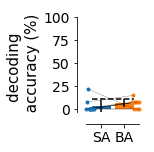

In [20]:
# making accuracy fig
Blue, Orange = '#1f77b4', '#ff7f0e'

fig = plt.figure(figsize=(1.1, 2.))

BA_accuracy, SA_accuracy = [], []
for k in np.unique(PRESYNAPTIC_PATTERNS_TEST):
    i0 = np.argwhere(np.array(PRESYNAPTIC_PATTERNS_TEST)==k).flatten()
    # print(i0, k)
    BA_accuracy.append(0)
    SA_accuracy.append(0)
    for i in i0:
        if PRESYNAPTIC_PATTERNS_TEST[i]==BA_PREDICTED[i]:
            BA_accuracy[-1] += 1./len(i0)
        if PRESYNAPTIC_PATTERNS_TEST[i]==SA_PREDICTED[i]:
            SA_accuracy[-1] += 1./len(i0)
    plt.plot([-0.5+(-1)**k*k/50.], [100.*SA_accuracy[-1]], '.', color=Blue)
    plt.plot([1.5+(-1)**k*k/50.], [100.*BA_accuracy[-1]], '.', color=Orange)
    plt.plot([-0.5+(-1)**k*k/50., 1.5+(-1)**k*k/50.],\
             [100.*SA_accuracy[-1], 100.*BA_accuracy[-1]], 'k-', lw=0.2)


plt.bar([0], [100.*np.array(SA_accuracy).mean()], yerr=[100.*np.array(SA_accuracy).std()], color=Blue)
plt.bar([1], [100.*np.array(BA_accuracy).mean()], yerr=[100.*np.array(BA_accuracy).std()], color=Orange)
plt.plot([-.4, 1.4], 100*1./len(PRESYNAPTIC_PATTERNS_RASTER)*np.ones(2), 'k--', label='chance')
plt.plot([0], [100], 'w.')
# plt.legend()
set_plot(plt.gca(), xticks=[0,1], yticks=np.arange(5)*25, xticks_labels=['SA', 'BA'], ylabel='decoding \n accuracy (%)')
fig.savefig(desktop+'temp.svg')

# Shifting presynaptic co-activations in pattern

In [146]:
from sparse_vs_balanced.sparse_spiking_input import get_scan
from graphs.my_graph import *

Patterns, seeds, _, DATA_SA = get_scan({},
                    filename='sparse_vs_balanced/data/sparse_input_SA_with_neuron_shift_synchronous_input.zip')
F_aff, seeds, Model, DATA_BA = get_scan({},
                    filename='sparse_vs_balanced/data/sparse_input_BA_with_neuron_shift_synchronous_input.zip')

PRESYNAPTIC_PATTERNS_WITH_NEURON_SHIFT = []
# each element will be a RASTER corresponding to one pattern and one seed !
SA_PATTERNS_WITH_NEURON_SHIFT,\
    BA_PATTERNS_WITH_NEURON_SHIFT = [], []

# we will also get the (trial-invariants) input patterns
PRESYNAPTIC_PATTERNS_RASTER_WITH_NEURON_SHIFT = []

for i in range(len(Patterns)):
    for j in range(len(seeds)): # seeds only in the first training seet
        for DATA, PATTERNS in zip([DATA_SA, DATA_BA],
                                  [SA_PATTERNS_WITH_NEURON_SHIFT,\
                                   BA_PATTERNS_WITH_NEURON_SHIFT]):
            data = DATA[i*len(seeds)+j]
            cond = (data['tRASTER_RecExc']>Model['t0']-t_pre) &\
                (data['iRASTER_RecExc']<int(Model['N_target'])) &\
                (data['tRASTER_RecExc']<Model['t0']+Model['time_span']+t_post)
            RASTER = []
            for ii in np.arange(int(Model['N_target'])):
                Nrn = []
                i0 = np.argwhere(data['iRASTER_RecExc'][cond]==ii).flatten()
                Nrn += list(data['tRASTER_RecExc'][cond][i0].flatten())
                RASTER.append(Nrn)
            PATTERNS.append(RASTER)
    PRESYNAPTIC_PATTERNS_WITH_NEURON_SHIFT.append(i)
    ## AFFERENT SPIKES
    ## We also collect the afferent stimulus (identical on all seeds, so we take it on the last 'j' seed)
    RASTER = []
    for n in np.arange(Model['N_target']):
        Nrn = []
        i0 = np.argwhere(data['iRASTER_PRE_in_terms_of_Pre_Pop'][0]==n).flatten()
        Nrn += list(data['tRASTER_PRE_in_terms_of_Pre_Pop'][0][i0].flatten())
        RASTER.append(Nrn)
    PRESYNAPTIC_PATTERNS_RASTER_WITH_NEURON_SHIFT.append(RASTER)

In [148]:
PATTERN_ID = 1
fig1 = show_presynaptic_activity_over_trials(PRESYNAPTIC_PATTERNS_RASTER_WITH_NEURON_SHIFT,
                                             nrn_ids=np.arange(100), pattern_id=PATTERN_ID,
                                             ms=3)
fig2 = show_spiking_activity_over_trials(SA_PATTERNS_WITH_NEURON_SHIFT,
                                         [],
                                         pattern_id=PATTERN_ID, Ntest=0, Ntraining=20, trial_max=20,
                                         nrn_ids=[0, 49, 7, 13, 14,\
                                                  9, 15, 47, 63, 79,\
                                                  92, 25, 93, 67, 81,\
                                                  82, 89, 77, 51, 60],
                                         ms=1)
fig3 = show_spiking_activity_over_trials(BA_PATTERNS_WITH_NEURON_SHIFT,
                                         [],
                                         pattern_id=PATTERN_ID, Ntest=0, Ntraining=20, trial_max=20,
                                         nrn_ids=[0, 49, 7, 13, 14,\
                                                  9, 15, 47, 63, 79,\
                                                  92, 25, 93, 67, 81,\
                                                  82, 89, 77, 51, 60],
                                         ms=1)
put_list_of_figs_to_svg_fig([fig1, fig2, fig3], fig_name=desktop+'temp.svg')

## Decoding (shifting presynaptic co-activations in pattern)

In [149]:
"""
A distance based on the Multi-Unit Van Rossum metrics
"""
import pymuvr                                     
def spike_train_distance(PATTERNS, cos=0.1, tau=5):
    return pymuvr.square_dissimilarity_matrix(PATTERNS,\
                                              cos, tau, 'distance')[0,1]
"""
Desiging a custom 'metric' function that fits the datatype of 'sklearn.neighbors.KNeighborsClassifier'
"""
# for the sparse activity data
def my_func_SA(X1, X2):
    flag1, index1 = X1
    flag2, index2 = X2
    # constructing RASTER1
    if flag1==1: RASTER1 = SA_PATTERNS_WITH_NEURON_SHIFT[int(index1)] # test flag
    elif flag1==0: RASTER1 = SA_PATTERNS_TRAINING[int(index1)] # training flag
    else: RASTER1 = None # this will raise an error
    # constructing RASTER2
    if flag2==1: RASTER2 = SA_PATTERNS_WITH_NEURON_SHIFT[int(index2)] # test flag
    elif flag2==0: RASTER2 = SA_PATTERNS_TRAINING[int(index2)] # training flag
    else: RASTER2 = None # this will raise an error
        
    return spike_train_distance([RASTER1, RASTER2])

# for the balanced activity data
def my_func_BA(X1, X2):
    flag1, index1 = X1
    flag2, index2 = X2
    # constructing RASTER1
    if flag1==1: RASTER1 = BA_PATTERNS_WITH_NEURON_SHIFT[int(index1)] # test flag
    elif flag1==0: RASTER1 = BA_PATTERNS_TRAINING[int(index1)] # training flag
    else: RASTER1 = None # this will raise an error
    # constructing RASTER2
    if flag2==1: RASTER2 = BA_PATTERNS_WITH_NEURON_SHIFT[int(index2)] # test flag
    elif flag2==0: RASTER2 = BA_PATTERNS_TRAINING[int(index2)] # training flag
    else: RASTER2 = None # this will raise an error
        
    return spike_train_distance([RASTER1, RASTER2])


In [150]:
"""
performing the classification for Sparse Activity
"""
import pymuvr
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=1, metric=my_func_SA)
neigh.fit([np.array([0, i]) for i in range(len(SA_PATTERNS_TRAINING))], PRESYNAPTIC_PATTERNS_TRAINING)
SA_PREDICTED = neigh.predict([[1, i] for i in range(len(SA_PATTERNS_WITH_NEURON_SHIFT))])

In [151]:
"""
performing the classification for Balanced Activity
"""
neigh = KNeighborsClassifier(n_neighbors=1, metric=my_func_BA)
neigh.fit([np.array([0, i]) for i in range(len(BA_PATTERNS_TRAINING))], PRESYNAPTIC_PATTERNS_TRAINING)
BA_PREDICTED = neigh.predict([[1, i] for i in range(len(BA_PATTERNS_WITH_NEURON_SHIFT))])

In [154]:
# making accuracy fig
Blue, Orange = '#1f77b4', '#ff7f0e'

fig = plt.figure(figsize=(1.1, 2.))

BA_accuracy, SA_accuracy = [], []
for k in np.unique(PRESYNAPTIC_PATTERNS_TEST):
    i0 = np.argwhere(np.array(PRESYNAPTIC_PATTERNS_TEST)==k).flatten()
    # print(i0, k)
    BA_accuracy.append(0)
    SA_accuracy.append(0)
    for i in i0:
        if PRESYNAPTIC_PATTERNS_TEST[i]==BA_PREDICTED[i]:
            BA_accuracy[-1] += 1./len(i0)
        if PRESYNAPTIC_PATTERNS_TEST[i]==SA_PREDICTED[i]:
            SA_accuracy[-1] += 1./len(i0)
    plt.plot([-0.5+(-1)**k*k/50.], [100.*SA_accuracy[-1]], '.', color=Blue)
    plt.plot([1.5+(-1)**k*k/50.], [100.*BA_accuracy[-1]], '.', color=Orange)
    plt.plot([-0.5+(-1)**k*k/50., 1.5+(-1)**k*k/50.],\
             [100.*SA_accuracy[-1], 100.*BA_accuracy[-1]], 'k-', lw=0.2)

plt.bar([0.], [100.*np.array(SA_accuracy).mean()], yerr=[100.*np.array(SA_accuracy).std()], color=Blue)
plt.bar([1.], [100.*np.array(BA_accuracy).mean()], yerr=[100.*np.array(BA_accuracy).std()], color=Orange)
plt.plot([-.4, 1.4], 100*1./len(PRESYNAPTIC_PATTERNS_RASTER)*np.ones(2), 'k--', label='chance')
plt.plot([0], [100], 'w.')
set_plot(plt.gca(), xticks=[0,1], yticks=np.arange(5)*25, xticks_labels=['SA', 'BA'], ylabel='decoding \n accuracy (%)')
fig.savefig(desktop+'temp.svg')

### Some more tests on the metrics

In [91]:
import pymuvr

def spike_train_distance(PATTERNS, cos=0., tau=5):
    return pymuvr.square_dissimilarity_matrix(PATTERNS,\
                                              cos, tau, 'distance')[0,1]
neuron1 = [0.3, 0.33, 0.45, 0.6, 0.7]
neuron2 = [0.33, 0.61]
neuron3 = [0.3, 0.33, 0.45, 0.6, 0.7]
neuron4 = [0.3]

Pattern1 = [neuron1, neuron2, neuron3, neuron4]
Pattern2 = [neuron1, neuron2, neuron3, neuron4]
print(spike_train_distance([Pattern1, Pattern2]))

Pattern1 = [neuron1, neuron2, neuron3, neuron4]
Pattern2 = [neuron3, neuron2, neuron1, neuron4]
print(spike_train_distance([Pattern1, Pattern2]))



1.19209289551e-07
1.19209289551e-07
